# Regression in Statistics & Machine Learning

Regression is a supervised learning technique used to model the relationship between a dependent variable (target, Y) and one or more independent variables (features, X).

## Types of Regression
### Linear Regression

Models the relationship as a straight line.

**Equation:** 
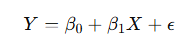

**Use case:** Predicting house prices, sales forecasts.


    Name Sex Age Height Weight
1    Ali   M  16    160     55
2   Sara   F  15    150     48
3   John   M  17    170     65
4 Ayesha   F  16    155     50
5  Bilal   M  15    165     60



Call:
lm(formula = Weight ~ Height, data = data)

Residuals:
         1          2          3          4          5 
-6.000e-01  1.200e+00  6.000e-01 -1.200e+00  4.219e-15 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -85.20000   11.09595  -7.678  0.00459 **
Height        0.88000    0.06928  12.702  0.00105 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.095 on 3 degrees of freedom
Multiple R-squared:  0.9817,	Adjusted R-squared:  0.9757 
F-statistic: 161.3 on 1 and 3 DF,  p-value: 0.001053


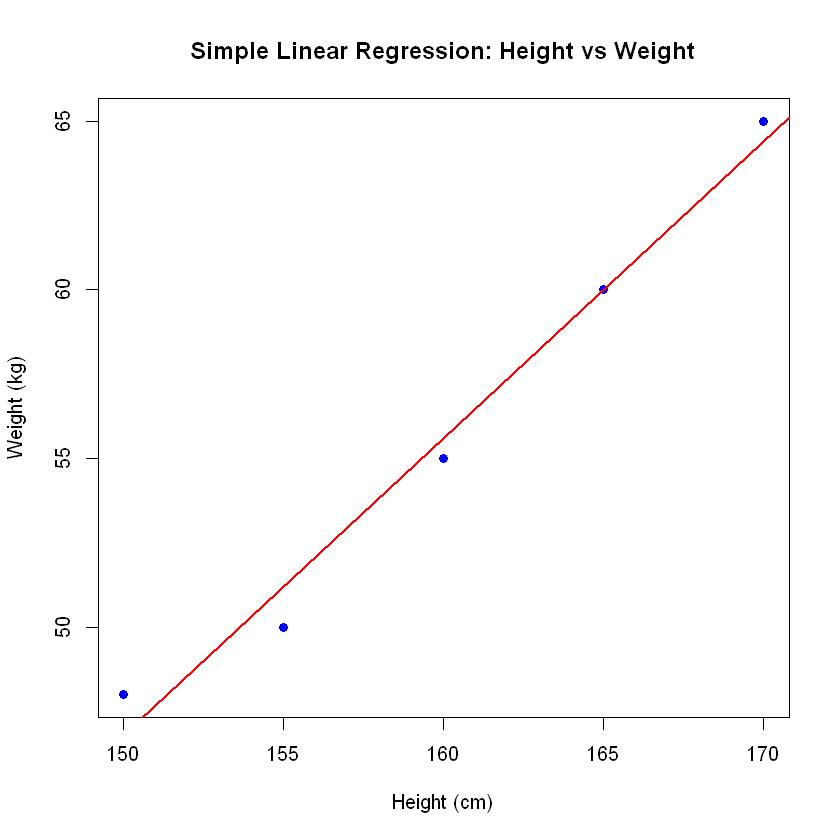

In [7]:
# Sample dataset
data <- data.frame(
  Name = c("Ali", "Sara", "John", "Ayesha", "Bilal"),
  Sex = c("M", "F", "M", "F", "M"),
  Age = c(16, 15, 17, 16, 15),
  Height = c(160, 150, 170, 155, 165),
  Weight = c(55, 48, 65, 50, 60)
)

# View dataset
print(data)

# Simple Linear Regression model: Weight ~ Height
model <- lm(Weight ~ Height, data = data)

# Summary of regression (coefficients, R², etc.)
summary(model)

# Scatter plot with regression line
plot(data$Height, data$Weight, 
     main = "Simple Linear Regression: Height vs Weight",
     xlab = "Height (cm)", ylab = "Weight (kg)",
     pch = 19, col = "blue")
abline(model, col = "red", lwd = 2)


In [9]:
# Install package if not installed
install.packages("Metrics")

# Load Metrics package
library(Metrics)

# Predictions on training data
pred <- predict(model, newdata = data)
actual <- data$Weight

# Evaluation metrics
mae_val <- mae(actual, pred)
mse_val <- mse(actual, pred)
rmse_val <- rmse(actual, pred)
r2_val <- summary(model)$r.squared

# Print results
cat("Mean Absolute Error (MAE):", mae_val, "\n")
cat("Mean Squared Error (MSE):", mse_val, "\n")
cat("Root Mean Squared Error (RMSE):", rmse_val, "\n")
cat("R-squared (R²):", r2_val, "\n")


Warning message:
"package 'Metrics' is in use and will not be installed"


Mean Absolute Error (MAE): 0.72 
Mean Squared Error (MSE): 0.72 
Root Mean Squared Error (RMSE): 0.8485281 
R-squared (R²): 0.9817444 


### Multiple Linear Regression

Extension of linear regression with multiple predictors.

**Equation:**
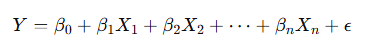

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...



Call:
lm(formula = medv ~ rm + lstat + ptratio + crim + nox, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2742  -3.1251  -0.9575   1.6719  30.3918 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17.46891    4.11629   4.244 2.62e-05 ***
rm           4.63324    0.42841  10.815  < 2e-16 ***
lstat       -0.52224    0.05129 -10.181  < 2e-16 ***
ptratio     -0.89354    0.11915  -7.500 2.94e-13 ***
crim        -0.06198    0.03155  -1.965    0.050 .  
nox         -1.31902    2.55265  -0.517    0.606    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.1 on 5 and 500 DF,  p-value: < 2.2e-16


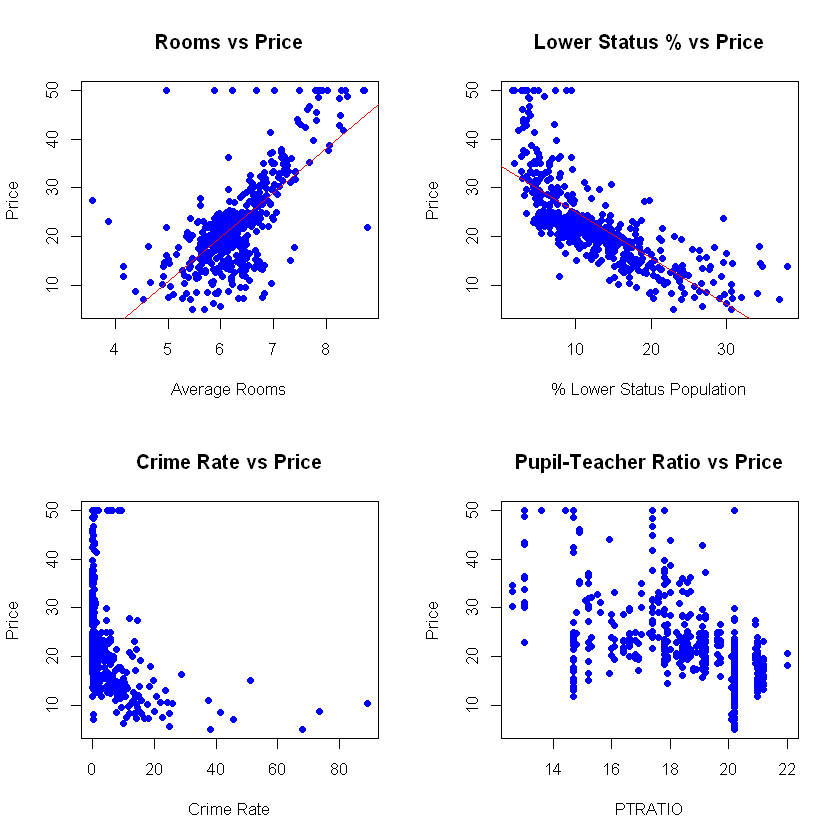

In [5]:
# Load dataset (in MASS package)
library(MASS)
data("Boston")

# Check structure
str(Boston)

# Simple linear regression with strong predictors
model <- lm(medv ~ rm + lstat + ptratio + crim + nox, data = Boston)
summary(model)

# Plot relationship between key predictors and price
par(mfrow=c(2,2))
plot(Boston$rm, Boston$medv, main="Rooms vs Price", xlab="Average Rooms", ylab="Price", pch=19, col="blue")
abline(lm(medv ~ rm, data=Boston), col="red")

plot(Boston$lstat, Boston$medv, main="Lower Status % vs Price", xlab="% Lower Status Population", ylab="Price", pch=19, col="blue")
abline(lm(medv ~ lstat, data=Boston), col="red")

plot(Boston$crim, Boston$medv, main="Crime Rate vs Price", xlab="Crime Rate", ylab="Price", pch=19, col="blue")

plot(Boston$ptratio, Boston$medv, main="Pupil-Teacher Ratio vs Price", xlab="PTRATIO", ylab="Price", pch=19, col="blue")


In [6]:
# Predictions
pred <- predict(model, newdata = Boston)
actual <- Boston$medv

# Evaluation metrics
mae_val <- mae(actual, pred)
mse_val <- mse(actual, pred)
rmse_val <- rmse(actual, pred)
r2_val <- summary(model)$r.squared

# Print results
cat("Mean Absolute Error (MAE):", mae_val, "\n")
cat("Mean Squared Error (MSE):", mse_val, "\n")
cat("Root Mean Squared Error (RMSE):", rmse_val, "\n")
cat("R-squared (R²):", r2_val, "\n")


Mean Absolute Error (MAE): 3.595151 
Mean Squared Error (MSE): 26.87392 
Root Mean Squared Error (RMSE): 5.184007 
R-squared (R²): 0.6816623 


### Polynomial Regression

Fits a curve (higher-order polynomial) instead of a line.

**Equation:**

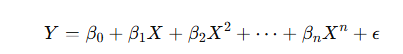  

**Use case:** Modeling non-linear trends.


Call:
lm(formula = Weight ~ poly(Height, 2, raw = TRUE), data = data)

Residuals:
      1       2       3       4       5 
 0.2571  0.3429 -0.2571 -0.7714  0.4286 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)
(Intercept)                  352.800000 196.014198   1.800    0.214
poly(Height, 2, raw = TRUE)1  -4.605714   2.453705  -1.877    0.201
poly(Height, 2, raw = TRUE)2   0.017143   0.007667   2.236    0.155

Residual standard error: 0.7171 on 2 degrees of freedom
Multiple R-squared:  0.9948,	Adjusted R-squared:  0.9896 
F-statistic: 190.7 on 2 and 2 DF,  p-value: 0.005216


       1        2        3 
47.65714 54.74286 65.25714 


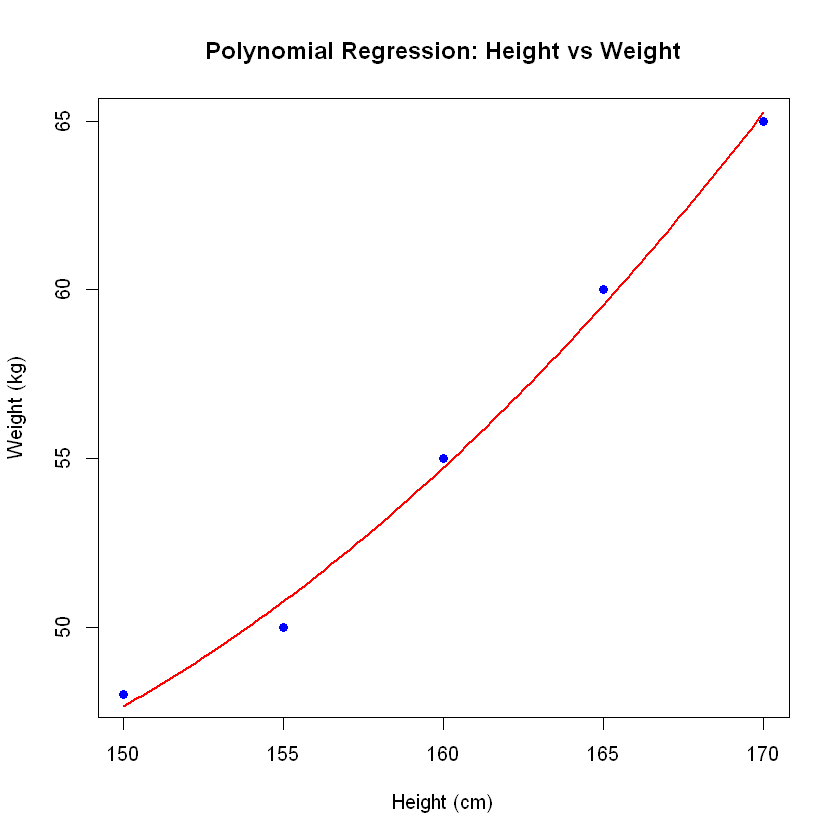

In [10]:
# Sample dataset
data <- data.frame(
  Name = c("Ali", "Sara", "John", "Ayesha", "Bilal"),
  Sex = c("M", "F", "M", "F", "M"),
  Age = c(16, 15, 17, 16, 15),
  Height = c(160, 150, 170, 155, 165),
  Weight = c(55, 48, 65, 50, 60)
)

# Polynomial Regression (quadratic)
poly_model <- lm(Weight ~ poly(Height, 2, raw = TRUE), data = data)

# Summary of model
summary(poly_model)

# Predict for new heights
new_heights <- data.frame(Height = c(150, 160, 170))
pred_poly <- predict(poly_model, newdata = new_heights)
print(pred_poly)

# Plot data + polynomial regression curve
plot(data$Height, data$Weight, 
     main = "Polynomial Regression: Height vs Weight",
     xlab = "Height (cm)", ylab = "Weight (kg)",
     pch = 19, col = "blue")

# Add regression curve
height_seq <- seq(min(data$Height), max(data$Height), length.out = 100)
lines(height_seq, predict(poly_model, newdata = data.frame(Height = height_seq)), 
      col = "red", lwd = 2)


In [11]:
# Predictions on training data
pred_poly <- predict(poly_model, newdata = data)
actual <- data$Weight

# Evaluation metrics
mae_poly <- mae(actual, pred_poly)
mse_poly <- mse(actual, pred_poly)
rmse_poly <- rmse(actual, pred_poly)
r2_poly <- summary(poly_model)$r.squared

# Print results
cat("Polynomial Regression Evaluation:\n")
cat("Mean Absolute Error (MAE):", mae_poly, "\n")
cat("Mean Squared Error (MSE):", mse_poly, "\n")
cat("Root Mean Squared Error (RMSE):", rmse_poly, "\n")
cat("R-squared (R²):", r2_poly, "\n")


Polynomial Regression Evaluation:
Mean Absolute Error (MAE): 0.4114286 
Mean Squared Error (MSE): 0.2057143 
Root Mean Squared Error (RMSE): 0.4535574 
R-squared (R²): 0.9947841 


## Summary
### Regression Types and Formulae 
*Notation:* `Y` = response, `X` = predictor, `b0, b1, ...` = coefficients, `e` = error.

| Regression Type              | Model Formula                              | Linearizable Form (if applicable)     | Notes |
|----------------------------- |------------------------------------------- |---------------------------------------|-------|
| Simple Linear                | Y = b0 + b1*X + e                          | —                                     | — |
| Multiple Linear              | Y = b0 + b1*X1 + b2*X2 + … + bp*Xp + e     | —                                     | — |
| Polynomial (degree n)        | Y = b0 + b1*X + b2*X^2 + … + bn*X^n + e    | — (fit by adding X, X^2, …, X^n)      | Watch for overfitting at high n |
| Logarithmic                  | Y = b0 + b1*ln(X) + e                      | — (use ln(X) as the feature)          | Requires X > 0 |
| Square Root                  | Y = b0 + b1*sqrt(X) + e                    | — (use sqrt(X) as the feature)        | Typically X ≥ 0 |
| Reciprocal                   | Y = b0 + b1*(1/X) + e                      | — (use 1/X as the feature)            | X ≠ 0 |
| Exponential                  | Y = a * exp(b*X) + e                       | ln(Y) = ln(a) + b*X + error           | Requires Y > 0 for log transform |


### Regression Evaluation Metrics

*Notation:*  
- `Yi` = actual value  
- `Ŷi` = predicted value  
- `n` = number of observations  
- `Ȳ` = mean of actual values  

| Metric                          | Formula                                                                                  | Interpretation                                                                 |
|--------------------------------|------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------|
| **Mean Absolute Error (MAE)**   | MAE = (1/n) Σ |Yi - Ŷi|                                                                   | Average absolute error; easy to interpret, less sensitive to outliers.         |
| **Mean Squared Error (MSE)**    | MSE = (1/n) Σ (Yi - Ŷi)²                                                                 | Penalizes larger errors more (due to squaring).                               |
| **Root Mean Squared Error (RMSE)** | RMSE = √[(1/n) Σ (Yi - Ŷi)²]                                                           | Square root of MSE; same units as target variable, widely used.               |
| **R-squared (R²)**              | R² = 1 - [Σ (Yi - Ŷi)² / Σ (Yi - Ȳ)²]                                                    | Proportion of variance explained by the model (0 ≤ R² ≤ 1).                   |
| **Adjusted R-squared**          | Adj R² = 1 - [(1 - R²)(n - 1) / (n - p - 1)]                                             | Adjusts R² for number of predictors; prevents artificial inflation.           |
| **Mean Absolute Percentage Error (MAPE)** | MAPE = (100/n) Σ |(Yi - Ŷi) / Yi|                                             | Percentage error; interpretable but unstable when Yi ≈ 0.                      |
